In [15]:
import pandas as pd
from collections import Counter
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../archive/classes.csv')

In [4]:
df.head()


,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [5]:
df.dtypes

filename       object
artist         object
genre          object
description    object
phash          object
width           int64
height          int64
genre_count     int64
subset         object
dtype: object

In [6]:
df.describe()

,width,height,genre_count
count,80042.000000,80042.000000,80042.000000
mean,1645.771058,1659.764848,1.017516
std,400.528095,401.144797,0.131374
min,1381.000000,1381.000000,1.000000
25%,1382.000000,1382.000000,1.000000
50%,1382.000000,1492.000000,1.000000
75%,1842.000000,1842.000000,1.000000
max,15754.000000,17768.000000,3.000000


In [7]:
df.describe(include="all")

,filename,artist,genre,description,phash,width,height,genre_count,subset
count,80042,80042,80042,80042,80042,80042.000000,80042.000000,80042.000000,80042
unique,80042,1119,114,75212,80020,NaN,NaN,NaN,3
top,Abstract_Expressionism/aaron-siskind_acolman-1...,vincent van gogh,['Impressionism'],self-portrait,fef3438ca0d605e1,NaN,NaN,NaN,train
freq,1,1888,12847,148,2,NaN,NaN,NaN,63998
mean,NaN,NaN,NaN,NaN,NaN,1645.771058,1659.764848,1.017516,NaN
std,NaN,NaN,NaN,NaN,NaN,400.528095,401.144797,0.131374,NaN
min,NaN,NaN,NaN,NaN,NaN,1381.000000,1381.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1382.000000,1382.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1382.000000,1492.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1842.000000,1842.000000,1.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80042 entries, 0 to 80041
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     80042 non-null  object
 1   artist       80042 non-null  object
 2   genre        80042 non-null  object
 3   description  80042 non-null  object
 4   phash        80042 non-null  object
 5   width        80042 non-null  int64 
 6   height       80042 non-null  int64 
 7   genre_count  80042 non-null  int64 
 8   subset       80042 non-null  object
dtypes: int64(3), object(6)
memory usage: 5.5+ MB


In [ ]:
df.dropna() # same number of entries as before -> no NaN values


,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train
...,...,...,...,...,...,...,...,...,...
80037,Impressionism/edgar-degas_portrait-of-mary-cas...,edgar degas,['Impressionism'],portrait-of-mary-cassatt,fc8d8c9c49e15365,1382,1756,1,uncertain artist
80038,High_Renaissance/giorgione_portrait-of-a-venet...,giorgione,['High Renaissance'],portrait-of-a-venetian-gentleman-1510(2),fcfc9b330325708c,1382,1645,1,uncertain artist
80039,High_Renaissance/titian_portrait-of-a-venetian...,titian,['High Renaissance'],portrait-of-a-venetian-nobleman(1),fcfc9b330325708c,1382,1645,1,uncertain artist
80040,High_Renaissance/pinturicchio_riconciliazione-...,pinturicchio,['High Renaissance'],riconciliazione-di-coriolano-1509,fef3438ca0d605e1,1382,1412,1,uncertain artist


In [11]:
df['genre'] = df['genre'].apply(ast.literal_eval)  # Convert string representation of lists to actual lists
genre_counts = Counter([g for sublist in df['genre'] for g in sublist])
print(genre_counts)

Counter({'Impressionism': 13060, 'Realism': 10733, 'Romanticism': 7019, 'Expressionism': 6736, 'Post Impressionism': 6450, 'Symbolism': 4528, 'Art Nouveau Modern': 4334, 'Baroque': 4240, 'Abstract Expressionism': 2782, 'Northern Renaissance': 2552, 'Naive Art Primitivism': 2405, 'Cubism': 2235, 'Rococo': 2089, 'Color Field Painting': 1615, 'Pop Art': 1483, 'Early Renaissance': 1391, 'High Renaissance': 1343, 'Minimalism': 1337, 'Mannerism Late Renaissance': 1279, 'Ukiyo e': 1167, 'Fauvism': 934, 'Pointillism': 513, 'Contemporary Realism': 481, 'New Realism': 314, 'Synthetic Cubism': 216, 'Analytical Cubism': 110, 'Action painting': 98})


In [12]:
artist_counts = df['artist'].value_counts()
print(artist_counts)

artist
vincent van gogh         1888
nicholas roerich         1816
pierre auguste renoir    1399
claude monet             1334
pyotr konchalovsky        924
                         ... 
lygia pape                  1
kurt schwitters             1
antoni tapies               1
lorser feitelson            1
philippe halsman            1
Name: count, Length: 1119, dtype: int64


In [13]:
description_counts = df['description'].value_counts()
print(description_counts)

description
self-portrait                                            148
untitled                                                  86
landscape                                                 72
still-life                                                61
unknown-title                                             51
                                                        ... 
donna-gravida-1909                                         1
farmyard-in-bloom-1904                                     1
female-semi-nude-with-hat-1910                             1
grandmother-and-granddaughter-1919                         1
coriolanus-persuaded-by-his-family-to-spare-rome-1509      1
Name: count, Length: 75212, dtype: int64


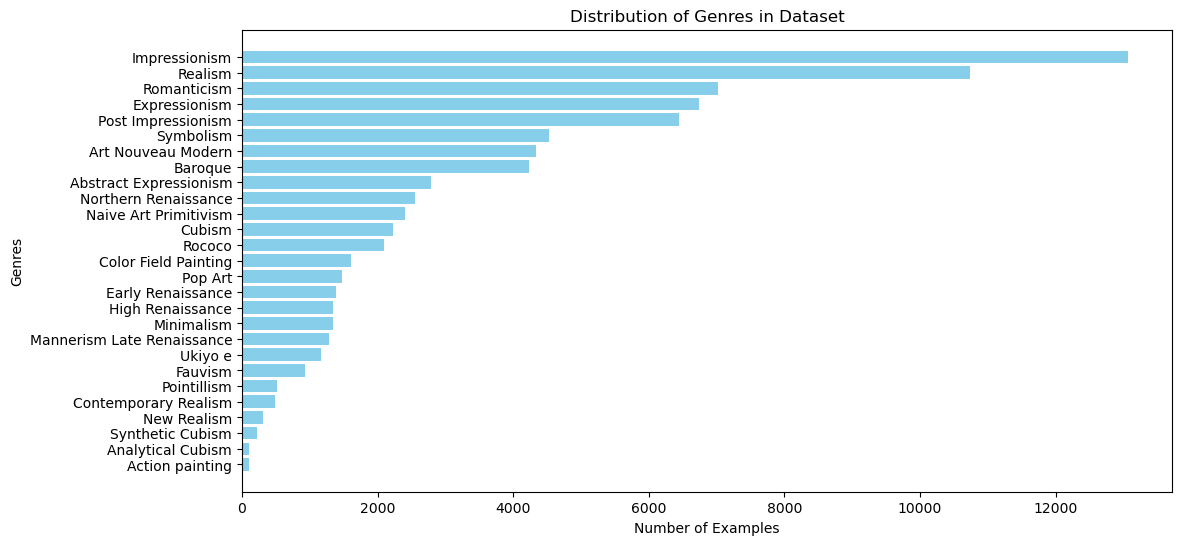

In [16]:
# Extract genres and counts from the Counter
genres, counts = zip(*genre_counts.most_common())  

plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel("Number of Examples")
plt.ylabel("Genres")
plt.title("Distribution of Genres in Dataset")
plt.gca().invert_yaxis()  # Highest count on top
plt.show()